In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from visualizer import Visualizer
visualizer = Visualizer()

In [3]:
dataframe = pd.read_csv("../clustering_diabetesdata.csv")

In [4]:
dataframe.describe()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
dataframe.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numb_of_Times_Preg          768 non-null    int64  
 1   PlasmaglucoseConcentration  768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinFoldThickness           768 non-null    int64  
 4   SerumInsulin                768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<AxesSubplot: title={'center': 'Correlation matrix'}>

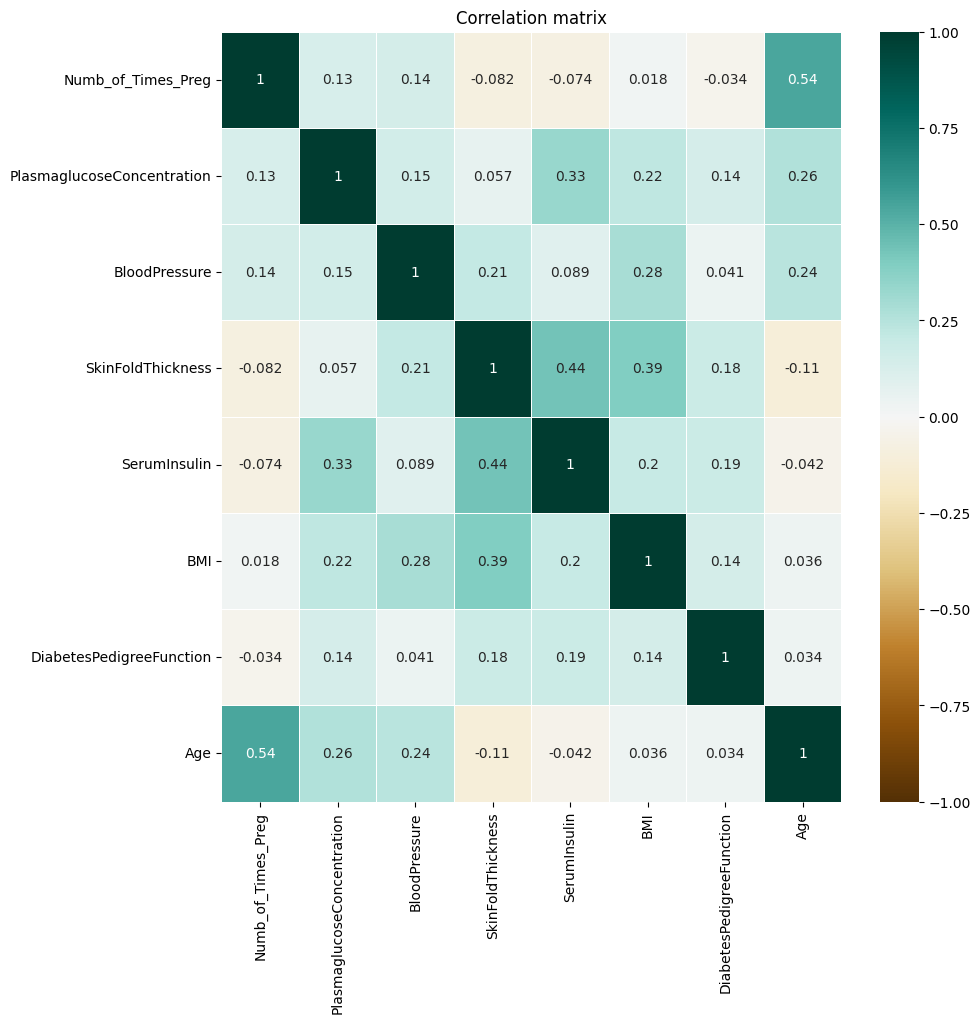

In [7]:
visualizer.corr_heatmap(data=dataframe)

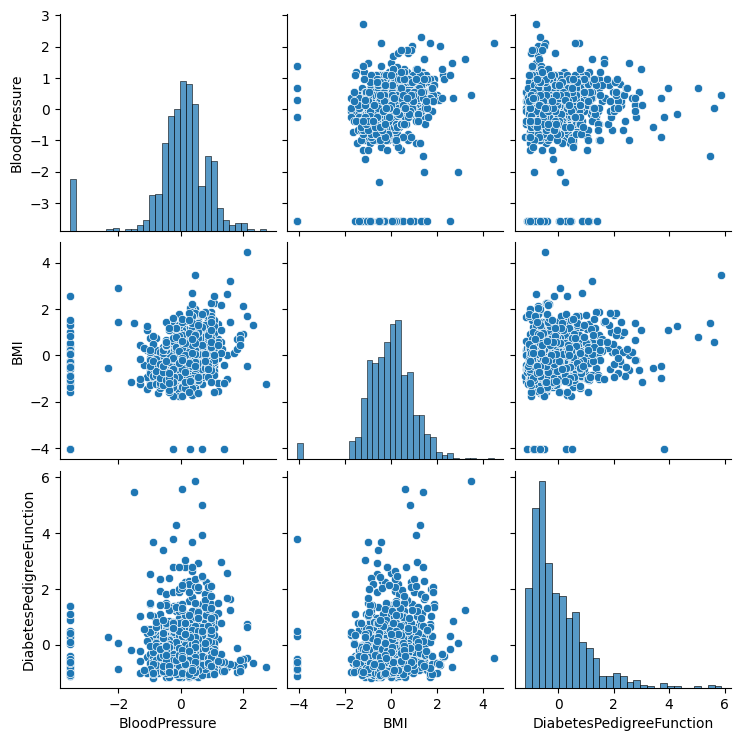

In [20]:
df = dataframe.iloc[:, [2, 5, 6]]
sns.pairplot(data=df)


In [22]:
def mean_normalize(data: pd.DataFrame) -> pd.DataFrame:
    normalized_df = (data - data.mean()) / data.std()
    return normalized_df

dataframe = mean_normalize(data=dataframe)

In [40]:
plt.scatter(dataframe[:, 0], dataframe[:, 1], marker='.')

InvalidIndexError: (slice(None, None, None), 0)

# KMeans

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [30]:
label = kmeans.fit_predict(dataframe)
plt.scatter(dataframe[label == label[1], 0], dataframe[label == label[2], 1])

InvalidIndexError: (array([False,  True, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True, False, False,  True, False,  True, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True]), 0)

In [39]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(dataframe[label == i, 0], dataframe[label == i, 1], label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

InvalidIndexError: (array([ True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False]), 0)

In [13]:
label = kmeans.fit_predict(dataframe)
centroids = kmeans.cluster_centers_

InvalidIndexError: (array([ True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False]), 0)